# Recurrent Neural Networks

## data Preprocessing

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
dataset_train = pd.read_csv('Google_Stock_Train (2010-2022).csv')


In [40]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [42]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[15.689439],
       [15.695195],
       [15.662162],
       ...,
       [86.980003],
       [86.620003],
       [86.980003]])

## Feature Scaling


In [45]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [47]:
len(training_set_scaled)    


3272

### creating a data structure with 60 timesteps and 1 output


In [50]:
timesteps = 60 # how many time steps to look back 
X_train = []
y_train = []
for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [52]:
X_train.shape, y_train.shape

((3212, 60), (3212,))

### reshaping

In [55]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [57]:
X_train.shape, y_train.shape

((3212, 60, 1), (3212,))

## building the RNN

### Keras libraries and packages

In [73]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### init the RNN


In [75]:
regressor = Sequential()

### adding the first LSTM layer and some Dropout regularisation


In [78]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

C:\Users\ggkau\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### adding a second LSTM layer and some Dropout regularisation


In [81]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


### adding a third LSTM layer and some Dropout regularisation


In [84]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))


### adding a fourth LSTM layer and some Dropout regularisation


In [87]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### adding the o/p layer


In [90]:
regressor.add(Dense(units=1))

## compiling the RNN


In [93]:
regressor.compile(optimizer='adam', loss='mean_squared_error')


#### RNN Summary

In [96]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

## fitting the RNN to the Training set


In [99]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0241
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0022
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0021
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0018
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0017
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0017
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0016
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0015
Epoch 9/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0022
Epoch 10/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0012
Epoch 11/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0015
Epoch 12/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0012
Epoch 13/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0017
Epoch 14/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0012
Epoch 15/100
101/101 ━━━━━━━

## making predictions and viz


### the real stock price of 2023

In [108]:
dataset_test = pd.read_csv('Google_Stock_Test (2023).csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


### the predicted stock price of 2023


In [111]:
dataset_total = pd.concat(
    (dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) -
                       len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)


In [113]:
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [115]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step


## findimg RMSE

In [117]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(real_stock_price, predicted_stock_price, squared=False)
print(rmse)


5.473808683203892


C:\Users\ggkau\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### --Visualising the results--


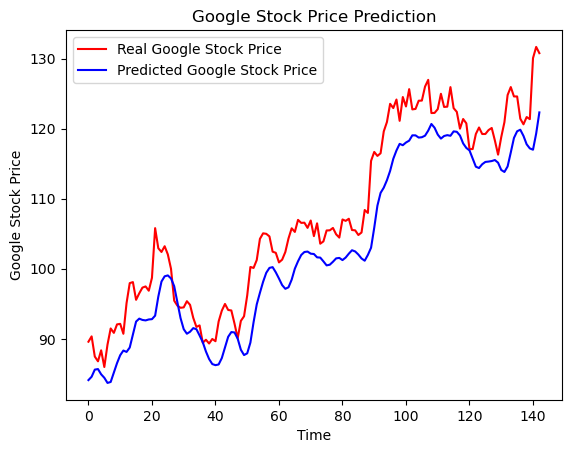

In [121]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',
         label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
